In [1]:
from util import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

## Linear Regression

In [4]:
lrs = [0.1, 0.01, 0.001]
fc_sug = torch.load('./LINREG/lr_sug')
fc_adam = torch.load('./LINREG/lr_adam_0.01')
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./LINREG/lr_'+str(lr))

FileNotFoundError: [Errno 2] No such file or directory: './LINREG/lr_sug'

SGD lr=0.1. Test score: 0.0938

SGD lr=0.01. Test score: 0.0938

SGD lr=0.001. Test score: 0.0938

SUG. Test score: 0.1020



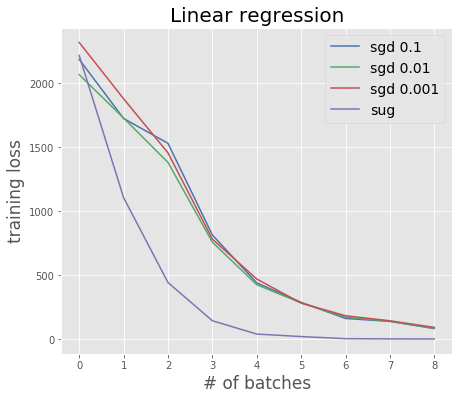

<function print>

In [66]:
# plot train loss per 1 batches
smooth_over = 1
figure = plt.figure(figsize=(7,6))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss'][:10]
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
    print("SGD lr={}. Test score: {:.4f}\n".format(lr, fc_sgd[lr]['val_loss'][-1]))
loss = fc_sug['tr_loss'][:10]    
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label="sug")
print("SUG. Test score: {:.4f}\n".format(fc_sug['val_loss'][-1]))
#loss = fc_adam['tr_loss'][:50]    
#plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label="Adam")
plt.xlabel("# of batches", fontsize=17)
plt.ylabel("training loss", fontsize=17)
plt.legend(fontsize=14)
plt.title("Linear regression", fontsize=20)
plt.savefig("img/linreg.png")
plt.savefig("img/linreg.eps")
plt.show()
print

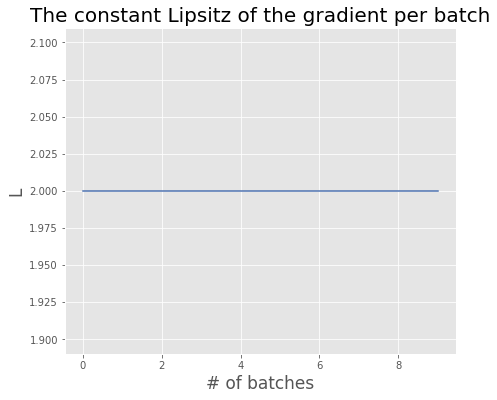

In [67]:
figure = plt.figure(figsize=(7,6))

plt.plot(fc_sug['lips'][:10])
plt.title("The constant Lipsitz of the gradient per batch", fontsize=20)
plt.xlabel("# of batches", fontsize=17)
plt.ylabel("L", fontsize=17)
plt.savefig("img/linreg_L.png")
plt.savefig("img/linreg_L.eps")
plt.show()

## MNIST : LR

In [4]:
lrs = [0.001]#[0.05, 0.01, 0.001]

In [6]:
fc_adam = torch.load('./MNIST/LR_Adam_0.001')
fc_asgd = torch.load('./MNIST/LR_accSGD')
fc_amsgrad = torch.load('./MNIST/LR_amsgrad')
fc_sug = torch.load('./MNIST/LR_sug')

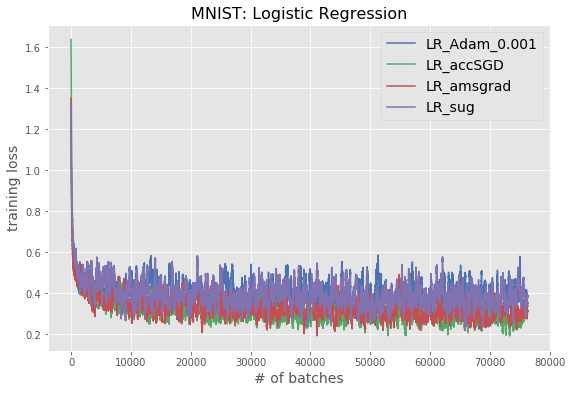

In [7]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
loss = fc_adam['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_Adam_0.001')
loss = fc_asgd['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_accSGD')
loss = fc_amsgrad['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_amsgrad')
loss = fc_sug['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_sug')


plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_bt.png')
plt.savefig('img/mnist_linreg_bt.eps')
plt.show()

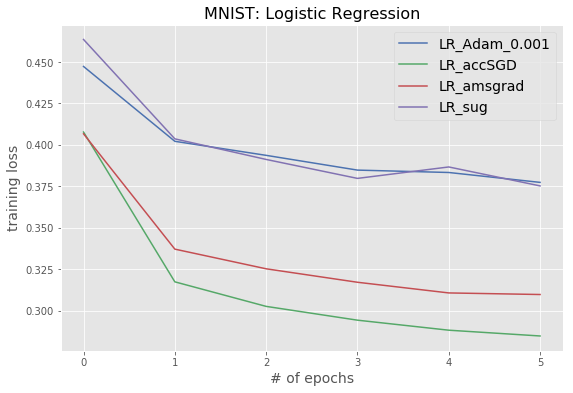

In [9]:
#plot train loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['tr_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['tr_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['tr_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_ep.png')
plt.savefig('img/mnist_linreg_ep.eps')
plt.show()

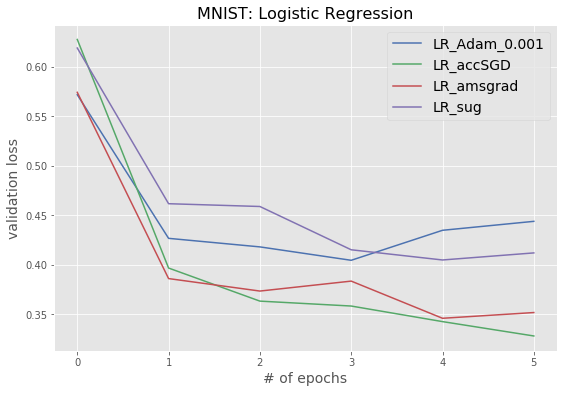

In [10]:
#plot validation loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['val_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['val_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['val_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=14)
plt.ylabel("validation loss", fontsize=14)
plt.title("MNIST: Logistic Regression", fontsize=16)
plt.legend(fontsize=14)
plt.savefig('img/mnist_linreg_val_ep.png')
plt.savefig('img/mnist_linreg_val_ep.eps')
plt.show()

## MNIST : FC

In [11]:
fc_adam = torch.load('./MNIST/FC_Adam_0.001')
fc_asgd = torch.load('./MNIST/FC_accSGD')
fc_amsgrad = torch.load('./MNIST/FC_amsgrad')
fc_sug = torch.load('./MNIST/FC_sug')

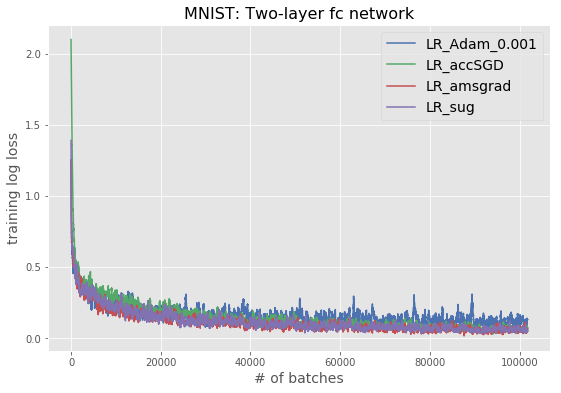

In [12]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
loss = fc_adam['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_Adam_0.001')
loss = fc_asgd['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_accSGD')
loss = fc_amsgrad['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_amsgrad')
loss = fc_sug['tr_loss']
plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='LR_sug')

plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training log loss", fontsize=14)
plt.title("MNIST: Two-layer fc network", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_bt.png")
plt.savefig("img/mnist_fc_bt.eps")
plt.show()

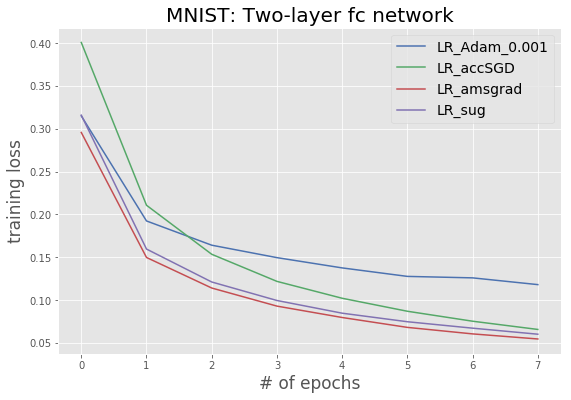

In [13]:
#plot train loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['tr_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['tr_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['tr_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("training loss", fontsize=17)
plt.title("MNIST: Two-layer fc network", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_ep.eps")
plt.show()

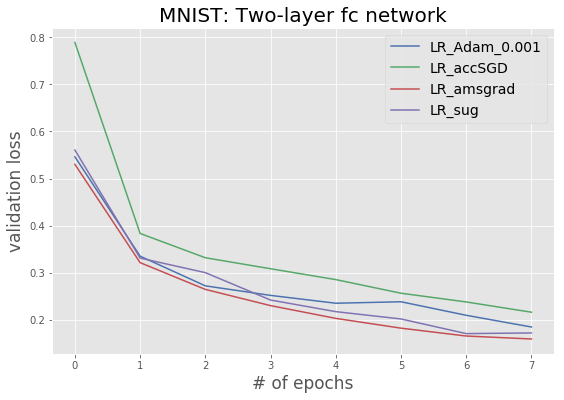

In [14]:
#plot validation loss per epoch
figure = plt.figure(figsize=(9,6))

n_epochs = fc_adam['epoch']
batch_per_ep = int(len(fc_adam['val_loss']) / fc_adam['epoch'])
loss = fc_adam['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_Adam_0.001')

n_epochs = fc_asgd['epoch']
batch_per_ep = int(len(fc_asgd['val_loss']) / fc_asgd['epoch'])
loss = fc_asgd['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_accSGD')

n_epochs = fc_amsgrad['epoch']
batch_per_ep = int(len(fc_amsgrad['val_loss']) / fc_amsgrad['epoch'])
loss = fc_amsgrad['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_amsgrad')

n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['tr_loss']
plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], 
         label='LR_sug')

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("validation loss", fontsize=17)
plt.title("MNIST: Two-layer fc network", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/mnist_fc_val.eps")
plt.show()

## CIFAR10 : CNN


In [0]:
fc_sug = torch.load('./CIFAR10/CNNsug20')
lrs = [0.01, 0.005]
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./CIFAR10/CNN_'+str(lr)+'_30')

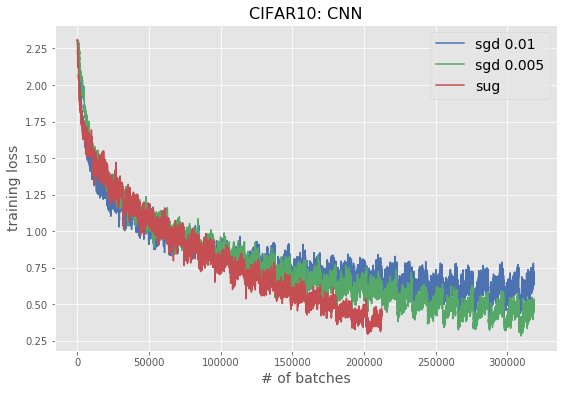

In [212]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(9,6))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches", fontsize=14)
plt.ylabel("training loss", fontsize=14)
plt.title("CIFAR10: CNN", fontsize=16)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_bt.eps")
plt.show()

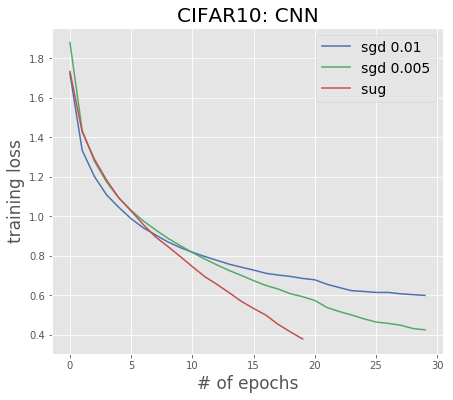

In [77]:
#plot train loss per epoch
figure = plt.figure(figsize=(7,6))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['tr_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("training loss", fontsize=17)
plt.title("CIFAR10: CNN", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_ep.eps")
plt.show()

SGD, lr = 0.01. Time utill overfitting: 2m 8s
SGD, lr = 0.005. Time utill overfitting: 2m 49s
SUG. Time utill overfitting: 5m 2s


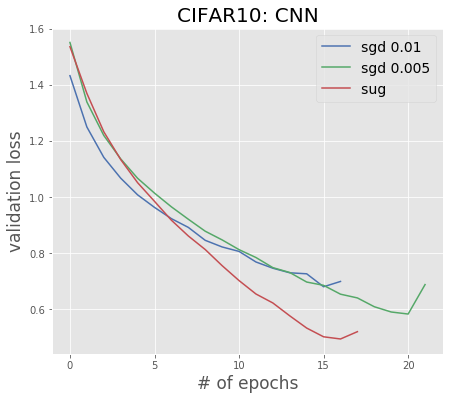

In [78]:
#plot val loss per epoch
figure = plt.figure(figsize=(7,6))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['val_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['val_loss']
    loss_per_ep = [sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)]
    for i, l in enumerate(loss_per_ep[:-2]):
        if l < loss_per_ep[i+1]:
            break    
    plt.plot(loss_per_ep[:i+2], label='sgd '+str(lr))
    print("SGD, lr = {}. Time utill overfitting: {}".format(lr, fc_sgd[lr]['times'][(i+1) * batch_per_ep]))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
loss = fc_sug['val_loss']
loss_per_ep = [sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)]
for i, l in enumerate(loss_per_ep[:-2]):
    if l < loss_per_ep[i+1]:
        break      
plt.plot(loss_per_ep[:i+2], label='sug ')
print("SUG. Time utill overfitting: {}".format(fc_sug['times'][(i+1) * batch_per_ep]))

plt.xlabel("# of epochs", fontsize=17)
plt.ylabel("validation loss", fontsize=17)
plt.title("CIFAR10: CNN", fontsize=20)
plt.legend(fontsize=14)
plt.savefig("img/cifar_cnn_val.eps")
plt.show()